In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./Comments (Filtered).csv')

df['timestamp'] = pd.to_datetime(df['createdAt'])

df['hour'] = df['timestamp'].dt.hour

df["date"] = pd.to_datetime(df["createdAt"])

# Extract Year-Month
df["year_month"] = df["date"].dt.to_period("M")


/tmp/ipykernel_648743/2658937468.py:14: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["year_month"] = df["date"].dt.to_period("M")


Upvote Distribution:
upvote_bin
(0, 20]       15885
(20, 40]        631
(40, 60]        232
(60, 80]        106
(80, 100]        63
(100, 120]       36
(120, 140]       25
(140, 160]       19
(160, 180]       18
Name: count, dtype: int64

Reply Distribution:
reply_bin
(0, 2]     10142
(2, 4]       668
(4, 6]       125
(6, 8]        52
(8, 10]       21
Name: count, dtype: int64


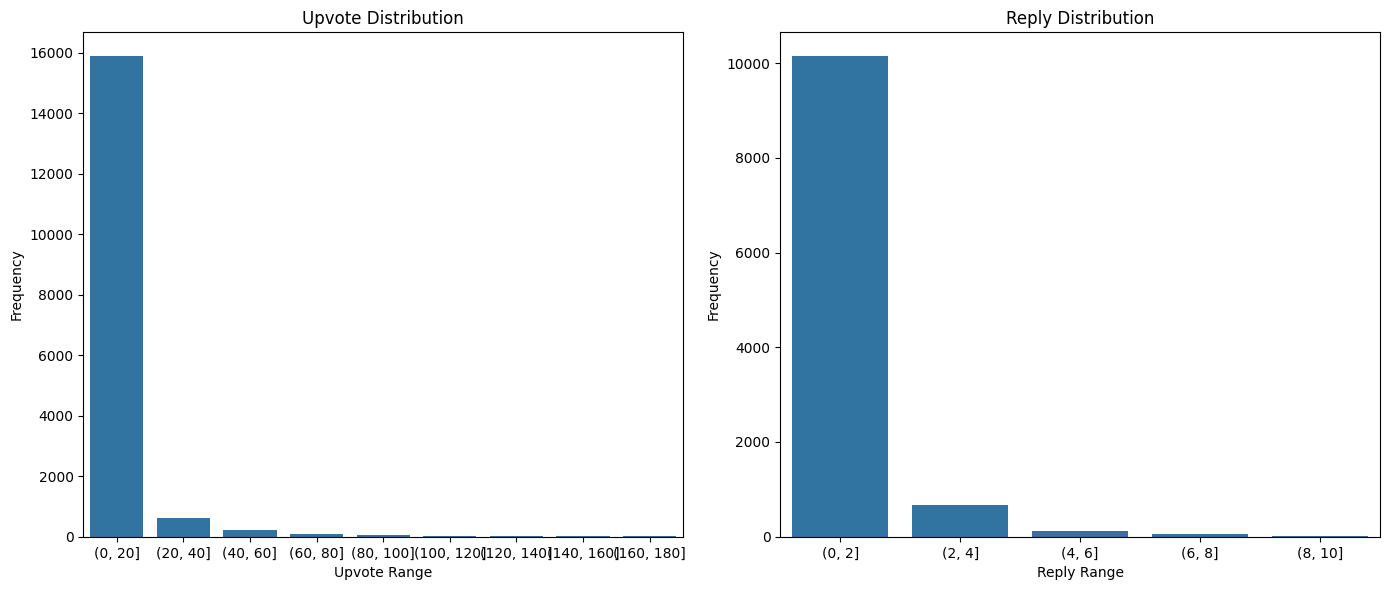

In [11]:
df['upVotes'] = pd.to_numeric(df['upVotes'], errors='coerce') 
df['numberOfreplies'] = pd.to_numeric(df['numberOfreplies'], errors='coerce')

upvote_bins = range(0, int(df['upVotes'].max()) + 20, 20)[:10]
reply_bins = range(0, int(df['numberOfreplies'].max()) + 20, 2)[:6]

df['upvote_bin'] = pd.cut(df['upVotes'], bins=upvote_bins)
upvote_dist = df['upvote_bin'].value_counts().sort_index()

# Reply distribution
df['reply_bin'] = pd.cut(df['numberOfreplies'], bins=reply_bins)
reply_dist = df['reply_bin'].value_counts().sort_index()

# Print the distributions
print("Upvote Distribution:")
print(upvote_dist)

print("\nReply Distribution:")
print(reply_dist)

# Plot the distributions
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for upvotes
sns.barplot(x=upvote_dist.index.astype(str), y=upvote_dist.values, ax=axes[0])
axes[0].set_title('Upvote Distribution')
axes[0].set_xlabel('Upvote Range')
axes[0].set_ylabel('Frequency')

# Plot for replies
sns.barplot(x=reply_dist.index.astype(str), y=reply_dist.values, ax=axes[1])
axes[1].set_title('Reply Distribution')
axes[1].set_xlabel('Reply Range')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

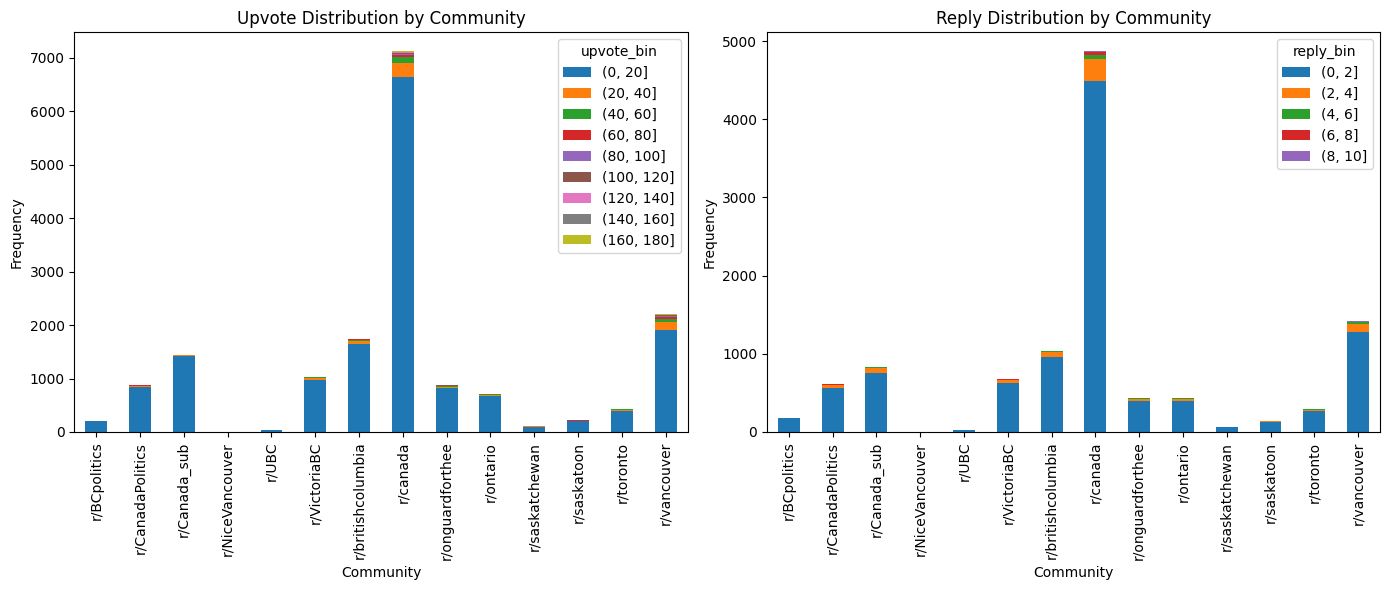

In [12]:
community_upvote_dist = df.groupby('communityName')['upvote_bin'].value_counts().unstack().fillna(0)

community_reply_dist = df.groupby('communityName')['reply_bin'].value_counts().unstack().fillna(0)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Upvotes by community
community_upvote_dist.plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('Upvote Distribution by Community')
axes[0].set_xlabel('Community')
axes[0].set_ylabel('Frequency')

# Replies by community
community_reply_dist.plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('Reply Distribution by Community')
axes[1].set_xlabel('Community')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


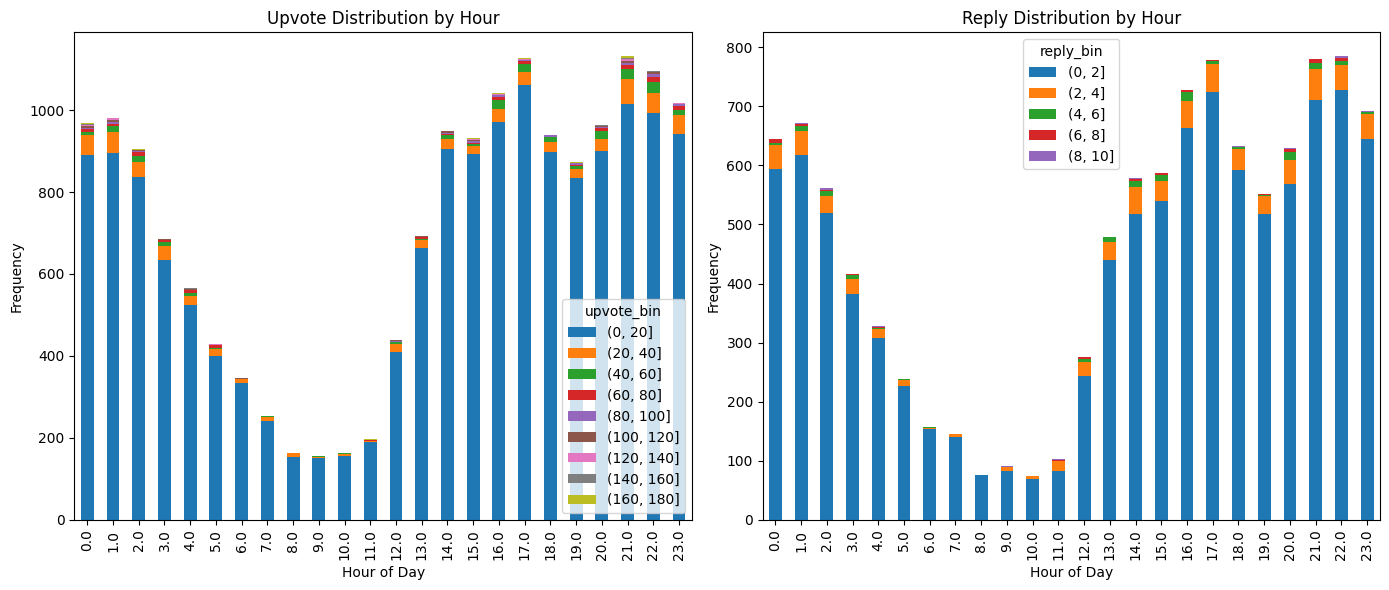

In [13]:
# Upvote distribution by hour of the day
hour_upvote_dist = df.groupby('year_month')['upvote_bin'].value_counts().unstack().fillna(0)

# Reply distribution by hour of the day
hour_reply_dist = df.groupby('hour')['reply_bin'].value_counts().unstack().fillna(0)

# Plotting conditional distributions by hour
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Upvotes by hour
hour_upvote_dist.plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('Upvote Distribution by Hour')
axes[0].set_xlabel('Hour of Day')
axes[0].set_ylabel('Frequency')

# Replies by hour
hour_reply_dist.plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('Reply Distribution by Hour')
axes[1].set_xlabel('Hour of Day')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


/tmp/ipykernel_648743/2550969532.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=comment_counts['year_month'].dt.strftime('%Y-%m'), y=comment_counts['count'], palette='Blues')


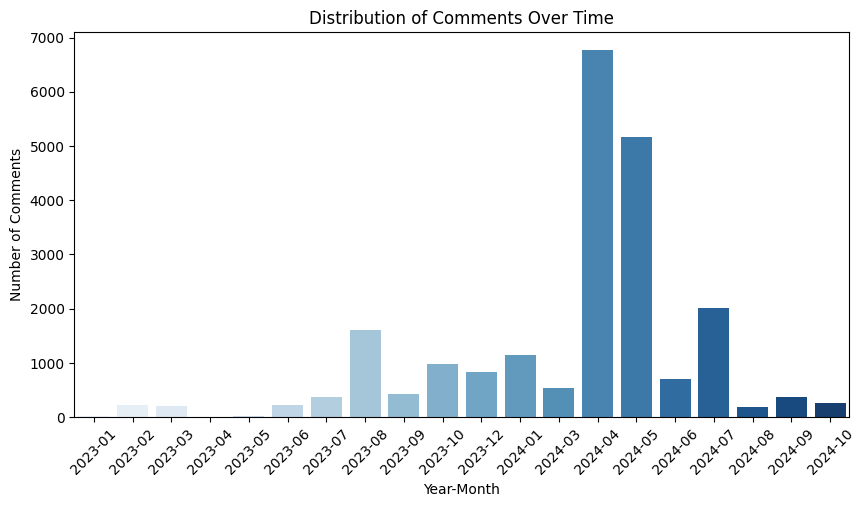

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns


# Group by 'year_month' and count comments
comment_counts = df.groupby(df['year_month']).size().reset_index(name='count')

# Sort by date
comment_counts = comment_counts.sort_values(by='year_month')

# Plot using Seaborn
plt.figure(figsize=(10, 5))
sns.barplot(x=comment_counts['year_month'].dt.strftime('%Y-%m'), y=comment_counts['count'], palette='Blues')

# Customize labels
plt.xlabel('Year-Month')
plt.ylabel('Number of Comments')
plt.title('Distribution of Comments Over Time')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show plot
plt.show()


Correlation between upvotes and replies (Overall):
                  upVotes  numberOfreplies
upVotes          1.000000         0.385328
numberOfreplies  0.385328         1.000000


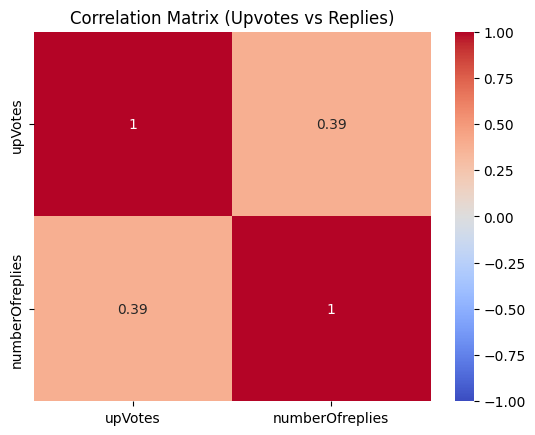

In [15]:
# Correlation between upvotes and replies overall
correlation = df[['upVotes', 'numberOfreplies']].corr()
print("Correlation between upvotes and replies (Overall):")
print(correlation)

# Plotting the correlation
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix (Upvotes vs Replies)')
plt.show()

In [16]:
# Correlation by community
community_correlation = df.groupby('communityName')[['upVotes', 'numberOfreplies']].corr().unstack().fillna(0)
print("Correlation by Community:")
print(community_correlation)

# Correlation by hour of the day
hour_correlation = df.groupby('hour')[['upVotes', 'numberOfreplies']].corr().unstack().fillna(0)
print("Correlation by Hour:")
print(hour_correlation)

Correlation by Community:
                  upVotes                 numberOfreplies                
                  upVotes numberOfreplies         upVotes numberOfreplies
communityName                                                            
r/BCpolitics          1.0        0.099279        0.099279             1.0
r/CanadaPolitics      1.0        0.378861        0.378861             1.0
r/Canada_sub          1.0        0.264806        0.264806             1.0
r/NiceVancouver       1.0        0.000000        0.000000             0.0
r/UBC                 1.0        0.245131        0.245131             1.0
r/VictoriaBC          1.0        0.441159        0.441159             1.0
r/britishcolumbia     1.0        0.470201        0.470201             1.0
r/canada              1.0        0.409658        0.409658             1.0
r/onguardforthee      1.0        0.293535        0.293535             1.0
r/ontario             1.0        0.508964        0.508964             1.0
r/saskatchew